In [4]:
# 필요한 라이브러리 임포트
import os
import json
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import h5py
from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')

# 플롯 스타일 설정
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

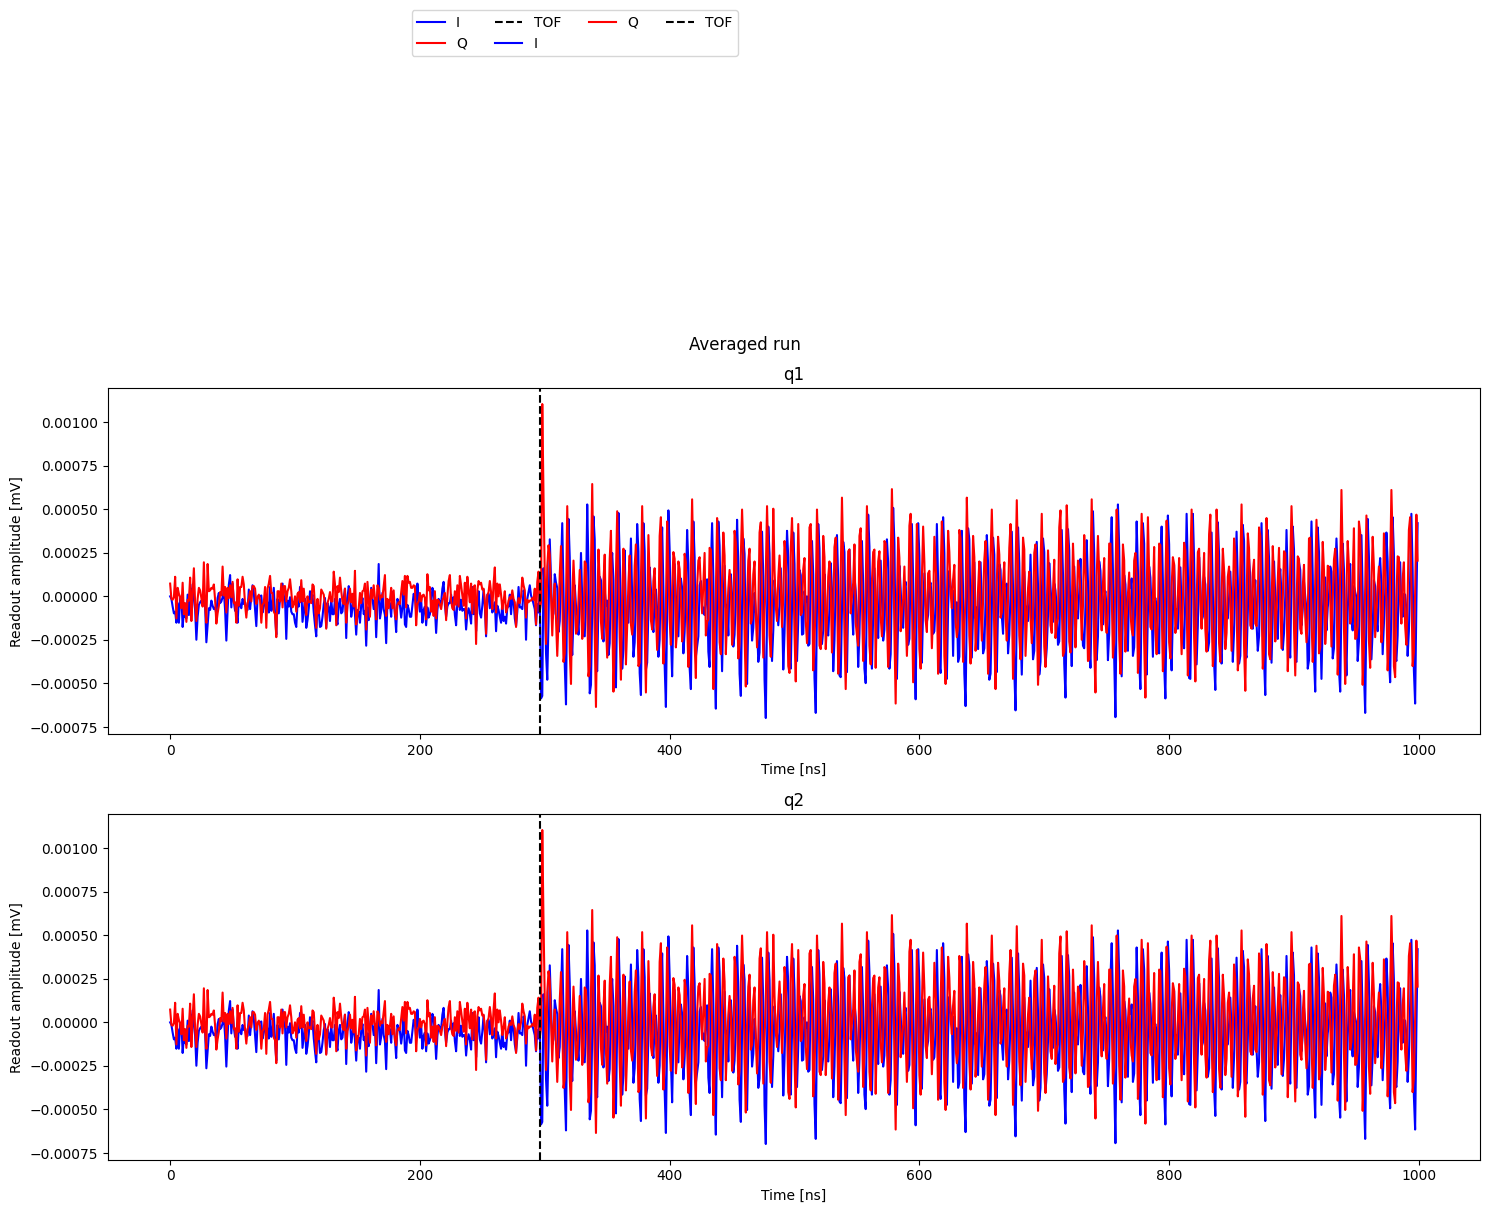

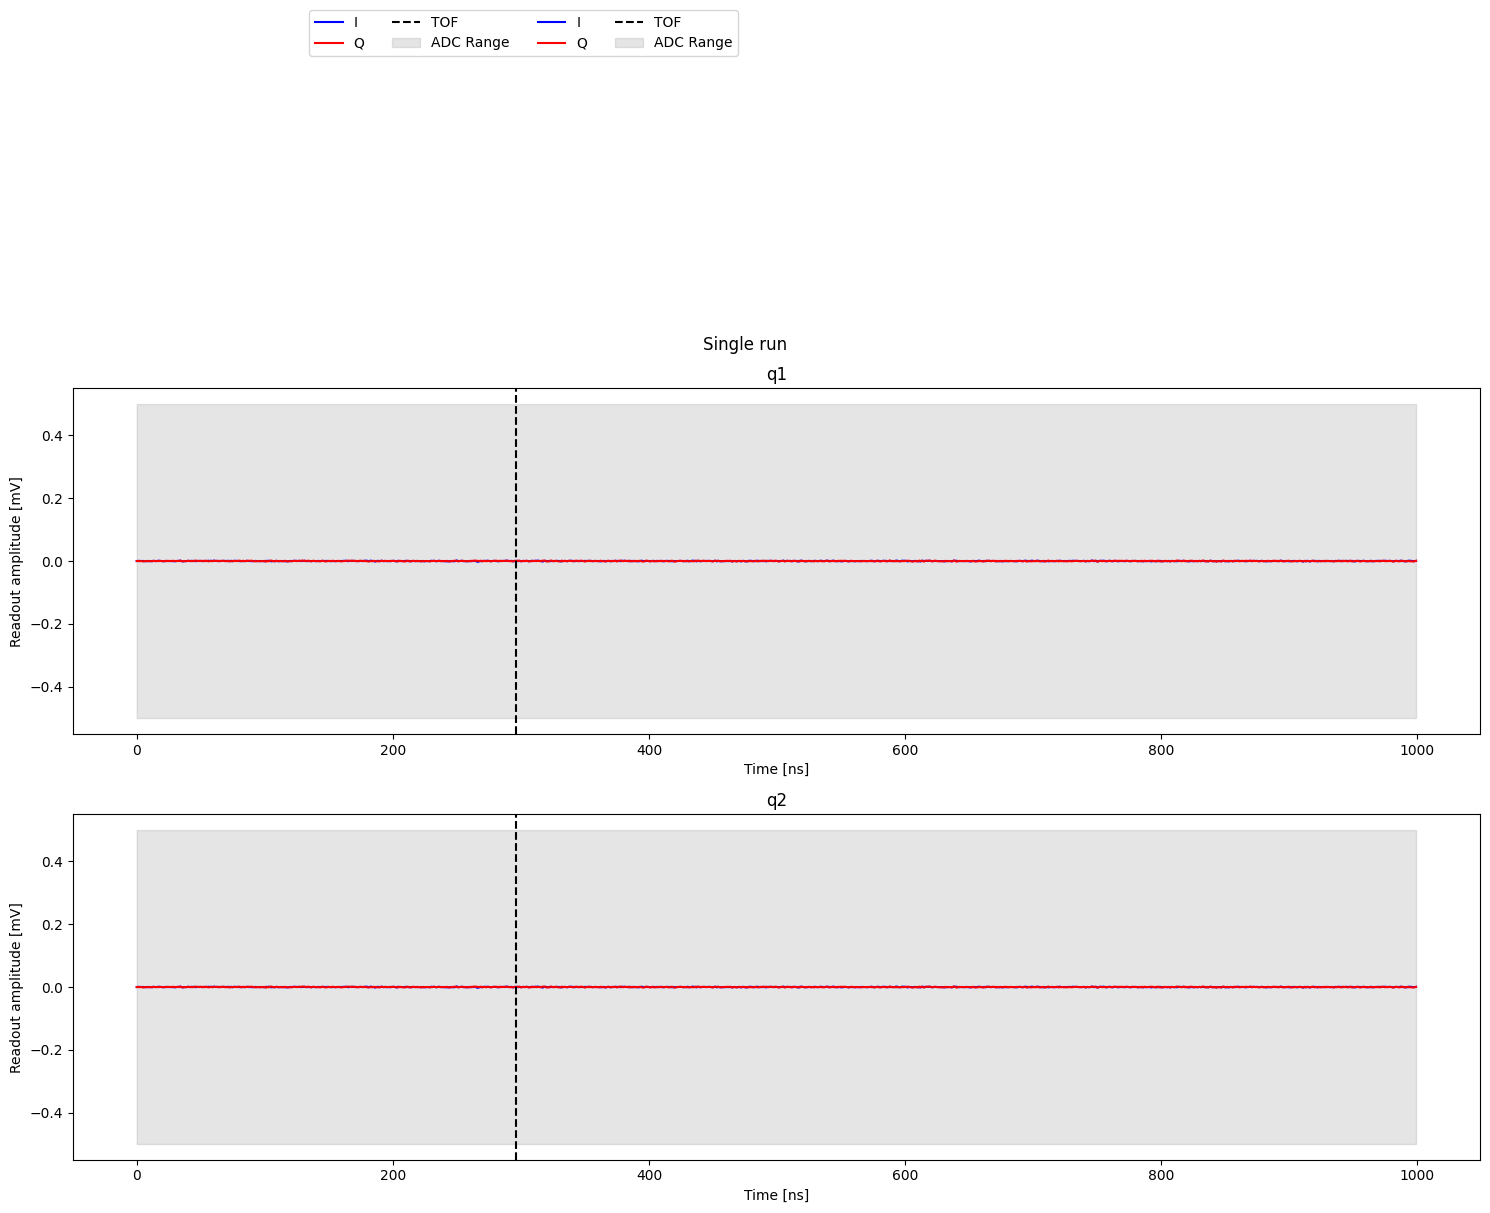

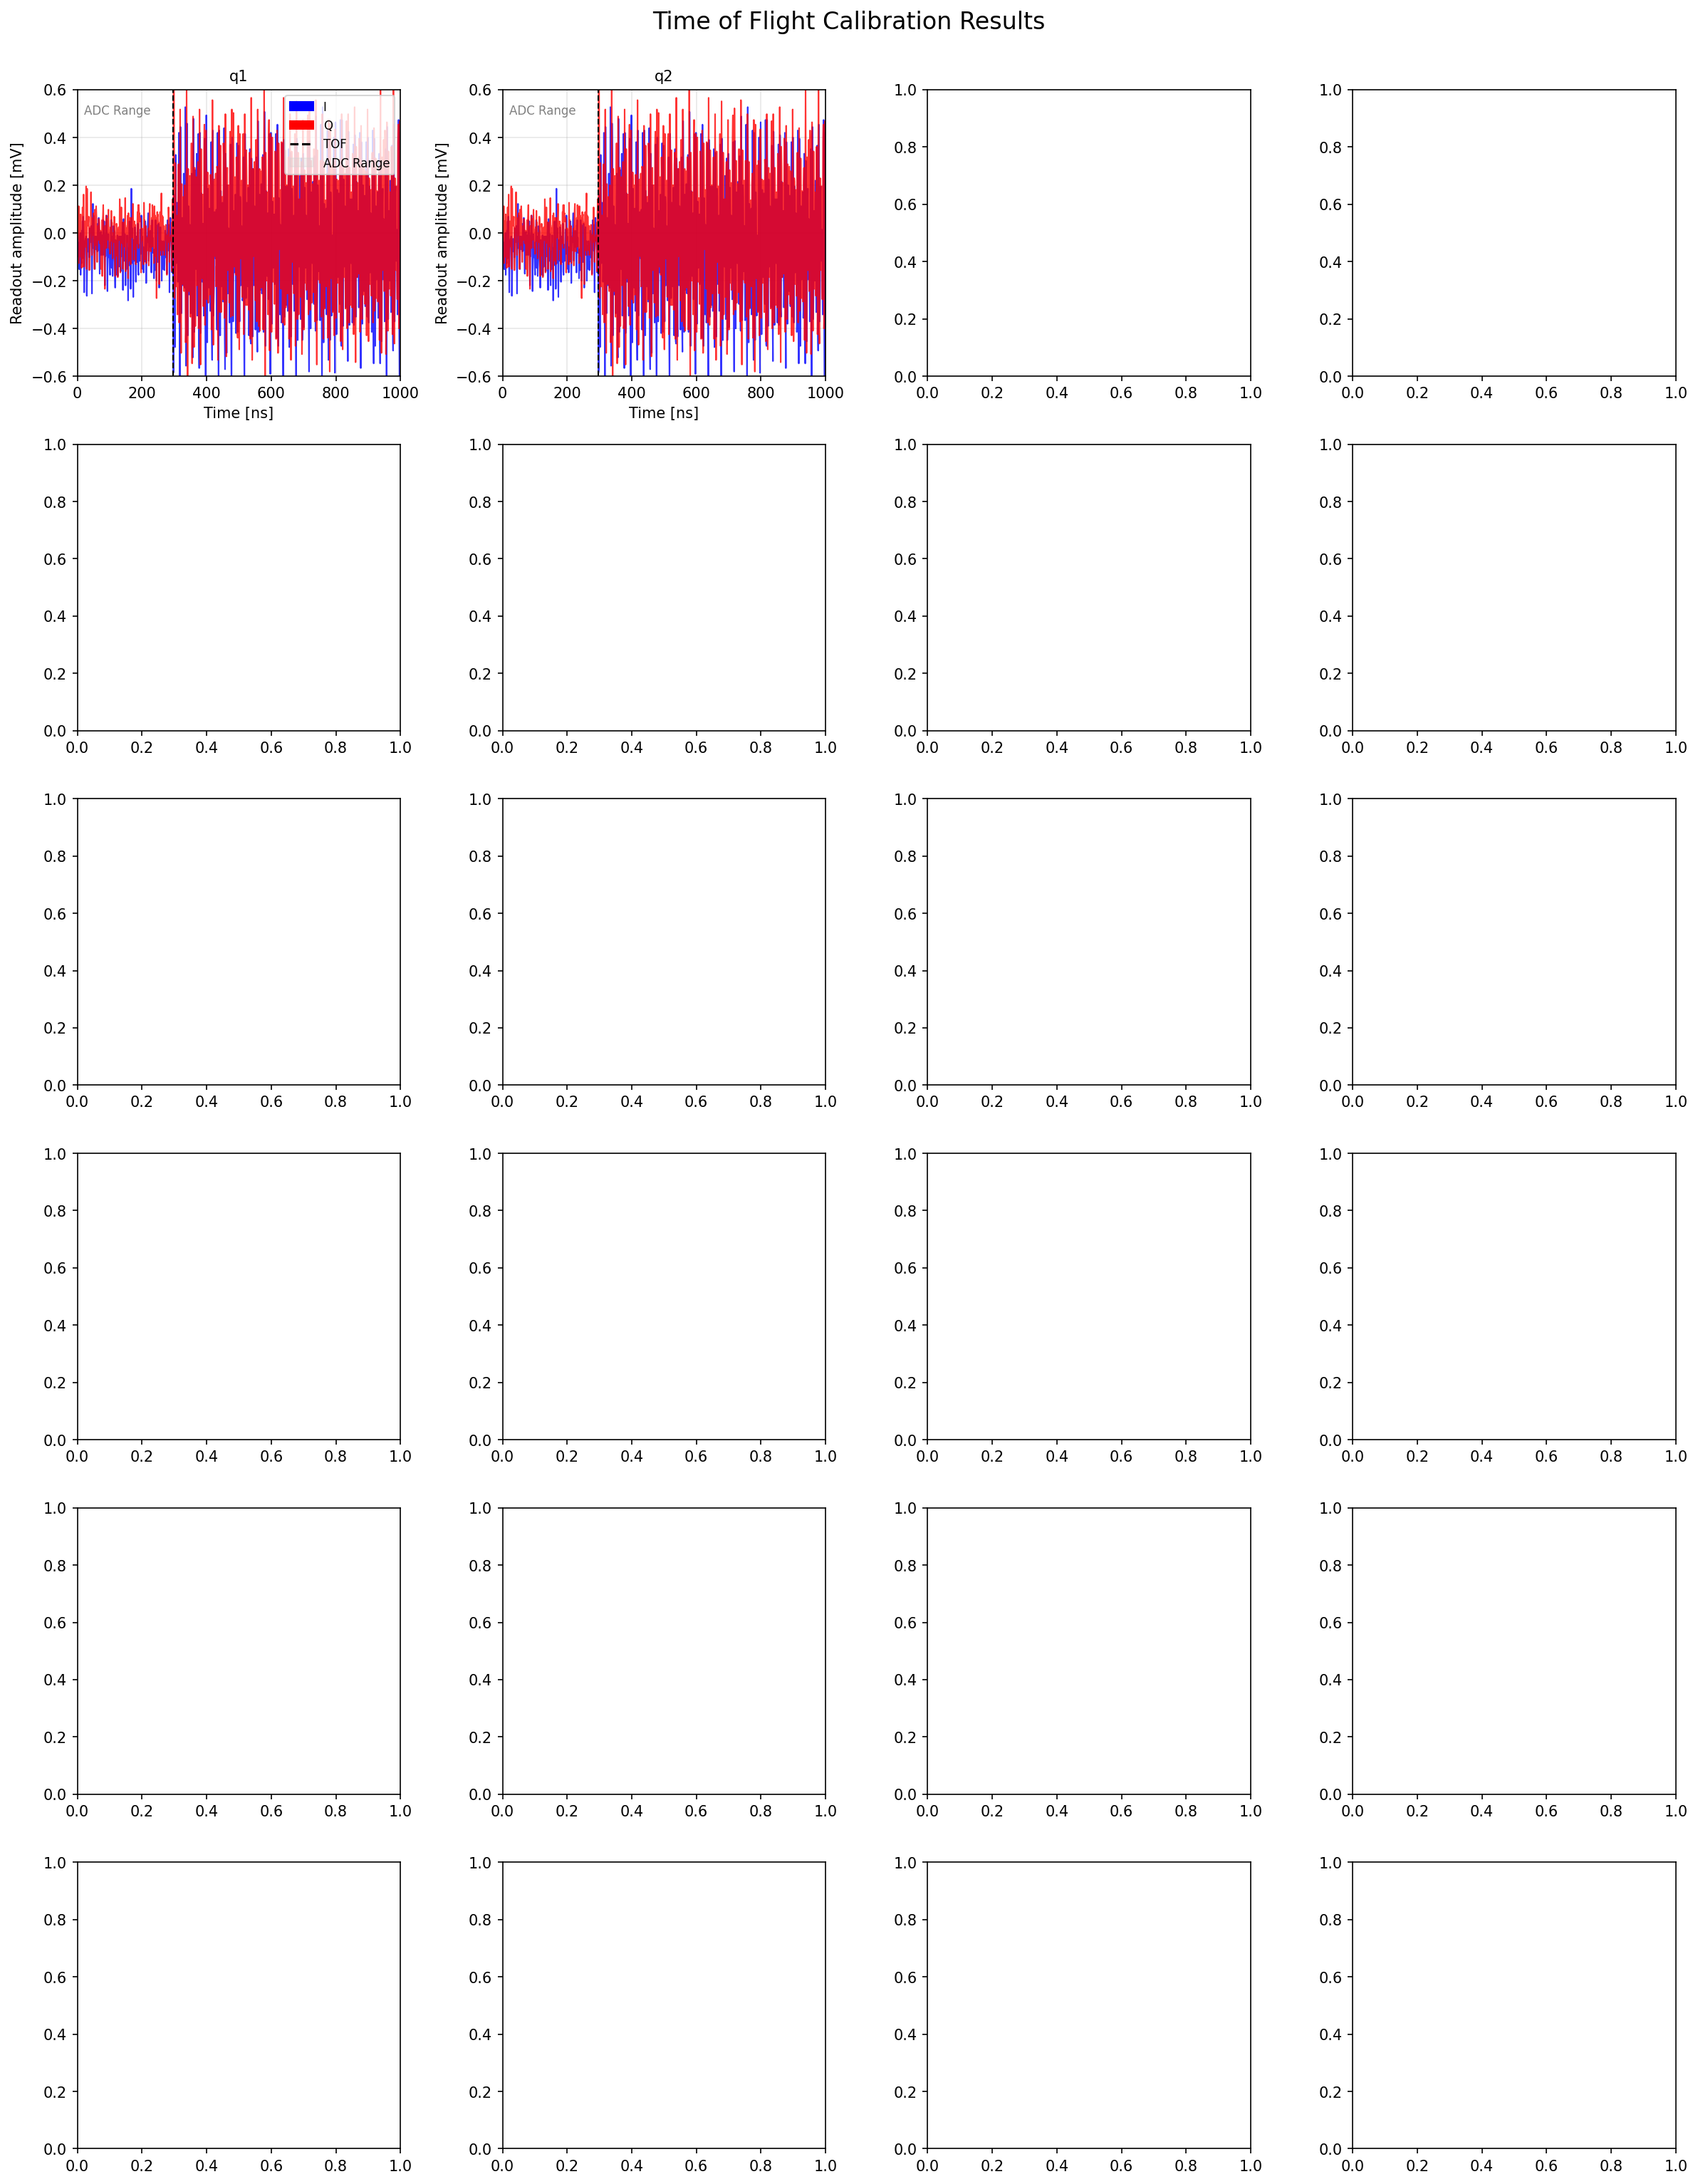

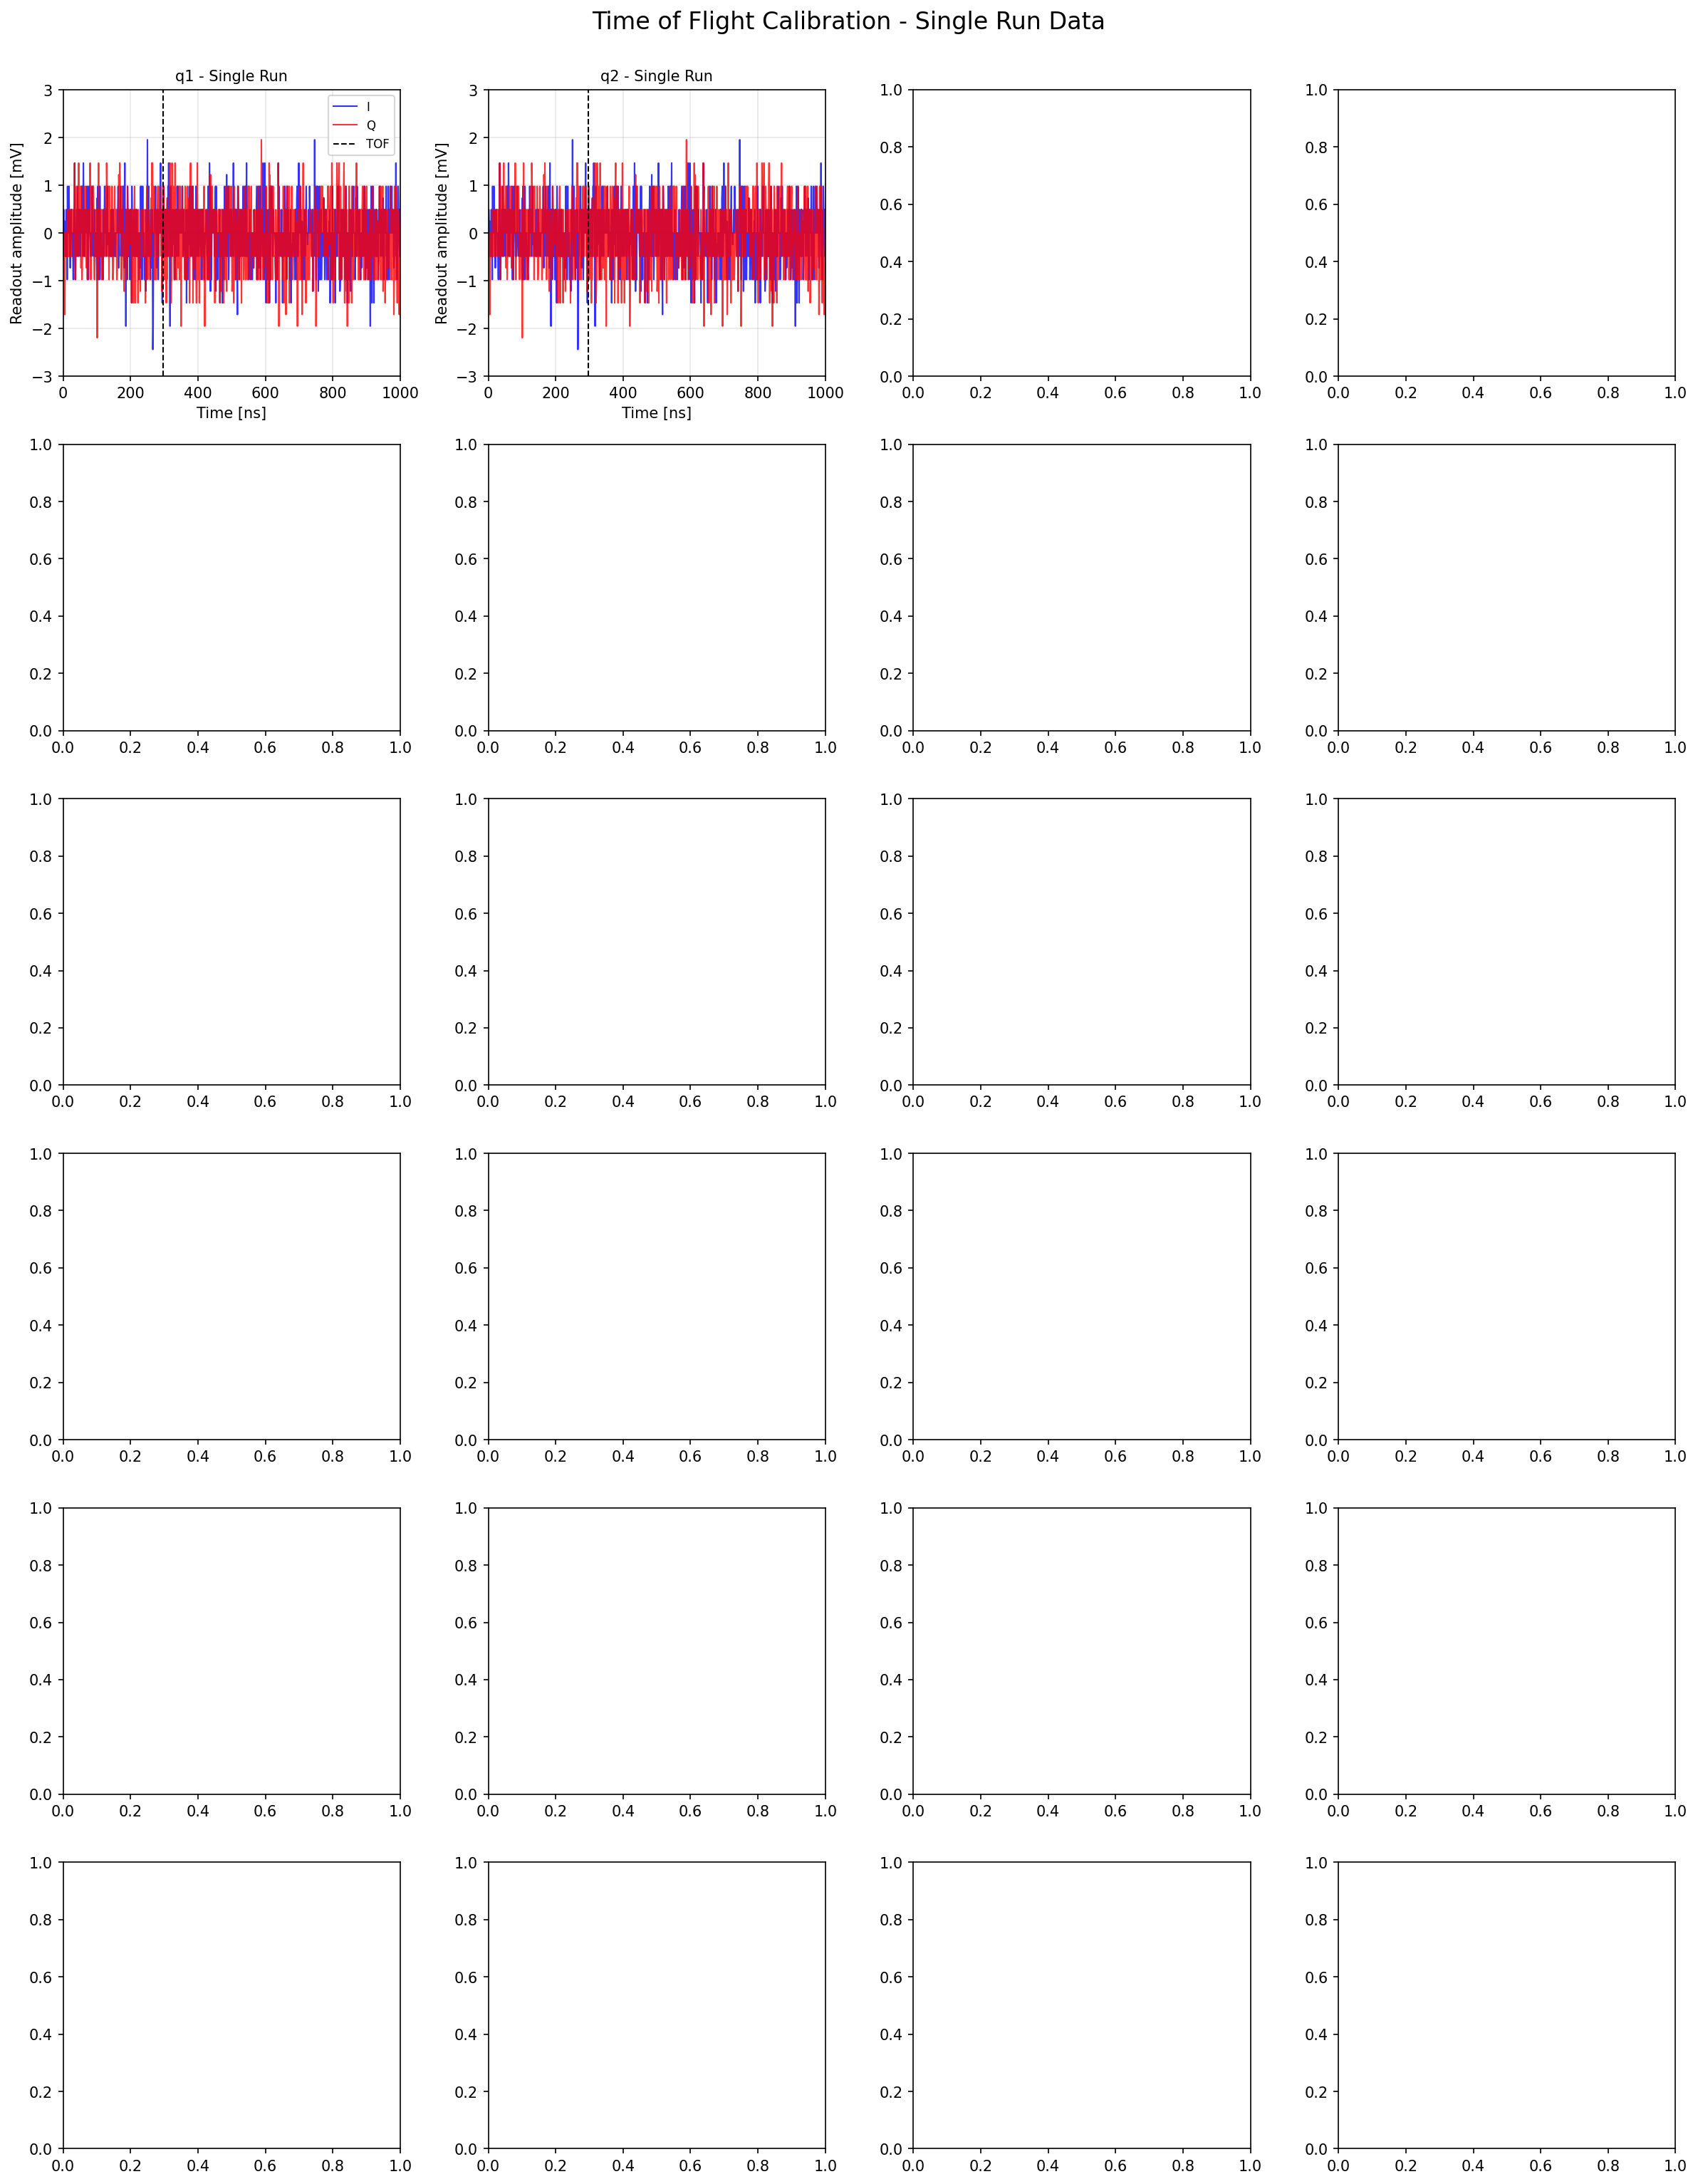

In [5]:
from glob import glob
figs = glob("./*.png")
for fig_ in figs:
    display(Image(fig_[2:], width=800))

In [6]:
# ds_raw.h5 파일 분석
print("\n\n\n==============================")
print("=== ds_raw.h5 파일 상세 분석 ===")
print("==============================")
ds_raw = xr.open_dataset('ds_raw.h5')

print("\n\n📊=========== Raw Dataset Structure===========")
print(ds_raw)

print("\n\n📊각 Key에 따른 데이터 구조")
ds_raw_lst = ['readout_time', 'qubit', 'adcI', 'adcQ', 'adc_single_runI', 'adc_single_runQ', 'IQ_abs', 'filtered_adc', 'threshold','delay']
for id_ in ds_raw_lst:
    try:
        ds_raw[id_]
        print(f"Key Name: {id_}")
        print(f"Shape: {ds_raw[id_].shape}")
        print(ds_raw[id_].values, "\n\n")
    except: pass

print("\n📊 각 변수별 상세 정보:")
for var_name in ds_raw.data_vars:
    var = ds_raw[var_name]
    print(f"\n[{var_name}]")
    print(f"  - Shape: {var.shape}")
    print(f"  - Dtype: {var.dtype}")
    print(f"  - Dimensions: {var.dims}")
    print(f"  - Sample values (first 5): {var.values.flat[:5]}")
    if var.ndim <= 2:
        print(f"  - Min: {var.min().values:.6f}, Max: {var.max().values:.6f}, Mean: {var.mean().values:.6f}")

# ds_fit.h5 파일 분석
print("\n\n\n==============================")
print("=== ds_fit.h5 파일 상세 분석 ===")
print("==============================")
ds_fit = xr.open_dataset('ds_fit.h5')

print("\n📊 Dataset 전체 구조:")
print(ds_fit)

print("\n\n📊각 Key에 따른 데이터 구조")
ds_fit_lst = ['readout_time', 'con', 'qubit', 'success', 'adcI', 'adcQ', 'adc_single_runI', 'adc_single_runQ', 'IQ_abs', 'filtered_adc', 'threshold', 'delay']
for id_ in ds_fit_lst:
    try:
        ds_fit[id_]
        print(f"Key Name: {id_}")
        print(f"Shape: {ds_fit[id_].shape}")
        print(ds_fit[id_].values, "\n\n")
    except: pass

# Fitting 관련 중요 변수들만 상세 분석
important_vars = ['delay', 'threshold', 'success']
print("\n📊 Fitting 관련 중요 변수들:")
for var_name in important_vars:
    if var_name in ds_fit.data_vars:
        var = ds_fit[var_name]
        print(f"\n[{var_name}]")
        print(f"  - Shape: {var.shape}")
        print(f"  - Values: {var.values}")


# Qubit 정보 추출 및 분석
print("\n\n\n==============================")
print("==============================")
print("=== Qubit 정보 분석 ===")
print("==============================")

# qubit 변수 분석
qubit_raw = ds_raw['qubit'].values

print(f"\nQubit 차원 정보:")
print(f"ds_raw['qubit'] → THis is just qubit list containing {qubit_raw}")
print(f"  - Shape: {qubit_raw.shape}")
print(f"  - Dtype: {qubit_raw.dtype}")

# Qubit 이름 디코딩 시도
try:
    # 바이트 문자열을 일반 문자열로 변환
    if qubit_raw.dtype.kind == 'S':  # 바이트 문자열인 경우
        qubit_names = []
        for q in qubit_raw:
            if isinstance(q, np.ndarray):
                name = b''.join(q).decode('utf-8').strip()
            else:
                name = q.decode('utf-8').strip()
            qubit_names.append(name)
        print(f"\nQubit 이름들: {qubit_names}")
        print(f"총 {len(qubit_names)}개의 큐빗")
except Exception as e:
    print(f"Qubit 이름 디코딩 실패: {e}")
    print(f"Raw qubit data: {qubit_raw[:3]}...")


# data.json 파일 분석
print("\n\n\n==============================")
print("=== data.json 파일 상세 분석 ===")
print("==============================")
with open('data.json', 'r') as f:
    data_json = json.load(f)

print("\n📊 최상위 키들:")
for key in data_json.keys():
    print(f"  - {key}")

# 각 섹션 분석
for section_name, section_data in data_json.items():
    print(f"\n[{section_name}]")
    if isinstance(section_data, dict):
        print(f"  - Type: dict, Keys: {list(section_data.keys())[:5]}...")
    elif isinstance(section_data, list):
        print(f"  - Type: list, Length: {len(section_data)}")
    else:
        print(f"  - Type: {type(section_data).__name__}")

# node.json 파일 분석
print("\n\n\n==============================")
print("=== node.json 파일 상세 분석 ===")
print("==============================")
with open('node.json', 'r') as f:
    node_json = json.load(f)

# metadata 섹션 상세 분석
if 'metadata' in node_json:
    metadata = node_json['metadata']
    print("\n📊 Metadata 정보:")
    for key, value in metadata.items():
        if isinstance(value, (str, int, float, bool)):
            print(f"  - {key}: {value}")
        else:
            print(f"  - {key}: {type(value).__name__}")

# data 섹션 분석
if 'data' in node_json:
    node_data = node_json['data']
    print("\n📊 Data 섹션 구조:")
    if isinstance(node_data, dict):
        for key in list(node_data.keys())[:10]:  # 처음 10개만
            print(f"  - {key}: {type(node_data[key]).__name__}")




=== ds_raw.h5 파일 상세 분석 ===


📊=========== Raw Dataset Structure===========
<xarray.Dataset> Size: 100kB
Dimensions:          (readout_time: 1000, qubit: 2)
Coordinates:
  * readout_time     (readout_time) int32 4kB 0 1 2 3 4 ... 995 996 997 998 999
  * qubit            (qubit) object 16B 'q1' 'q2'
Data variables:
    adcI             (qubit, readout_time) float64 16kB ...
    adcQ             (qubit, readout_time) float64 16kB ...
    adc_single_runI  (qubit, readout_time) float64 16kB ...
    adc_single_runQ  (qubit, readout_time) float64 16kB ...
    IQ_abs           (qubit, readout_time) float64 16kB ...
    filtered_adc     (qubit, readout_time) float64 16kB ...
    threshold        (qubit) float64 16B ...
    delay            (qubit) float64 16B ...


📊각 Key에 따른 데이터 구조
Key Name: readout_time
Shape: (1000,)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42

Loading data files...
Number of qubits: 2
Qubits: ['q1' 'q2']

Fitting success for each qubit: [ True  True]

Number of fit results available: 2


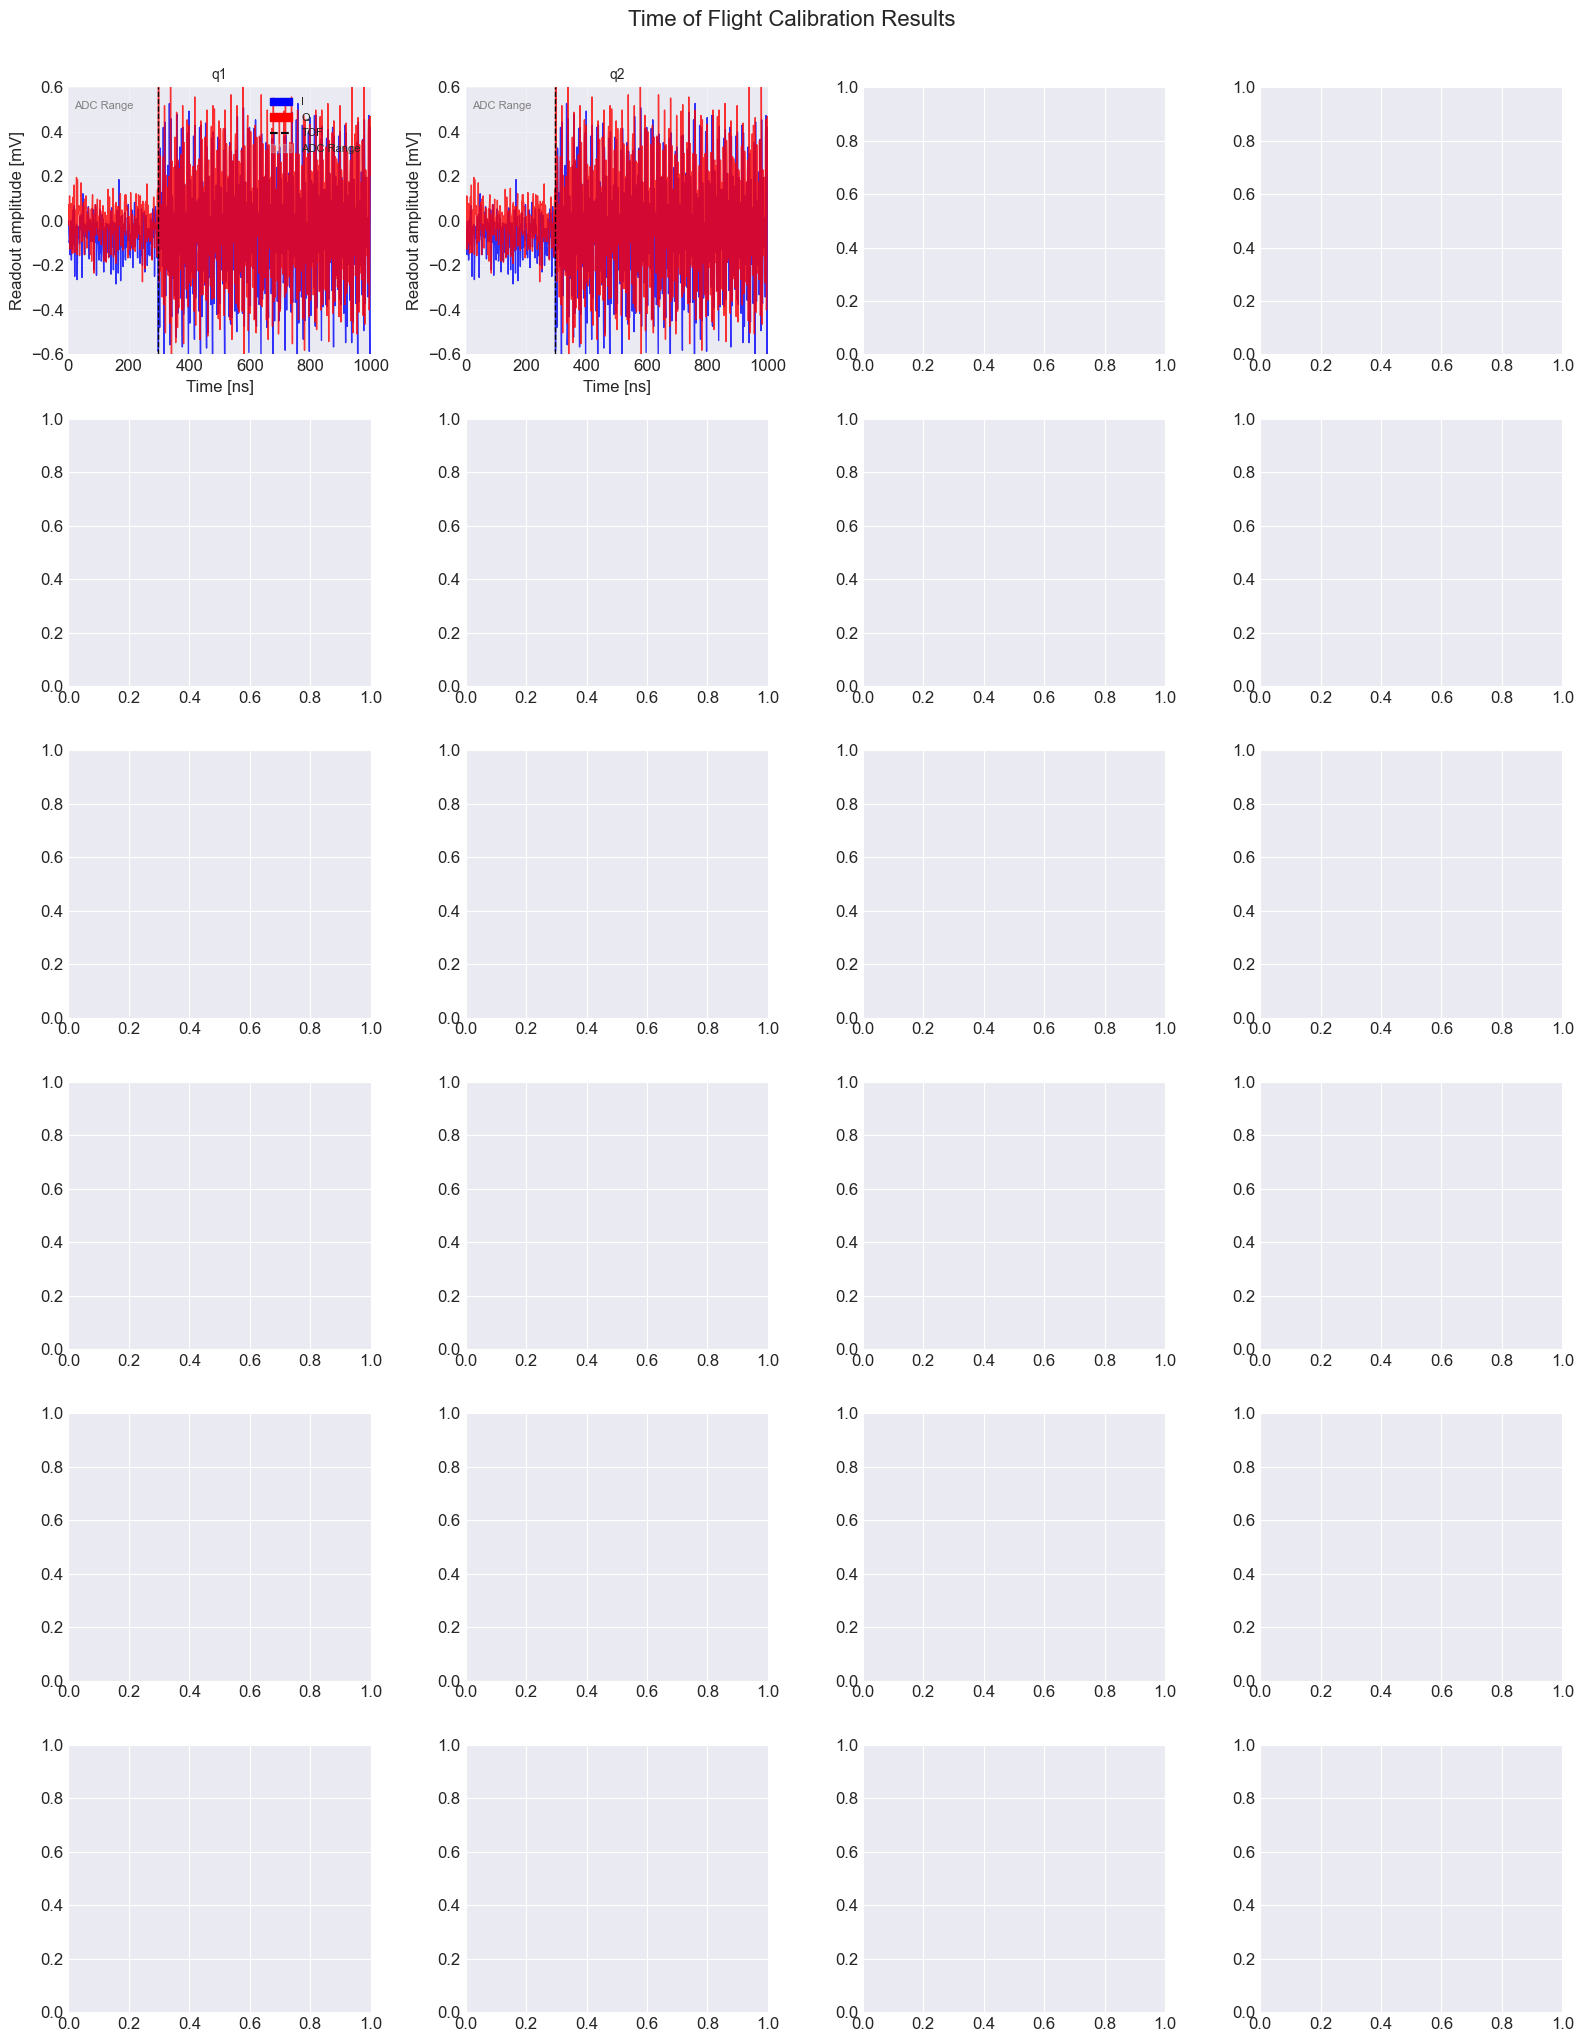


=== Summary Statistics ===
Qubit | Delay (ns) | Threshold (mV) | Fitting Success
--------------------------------------------------
q1    |      296.0 |          0.29 | True
q2    |      296.0 |          0.29 | True


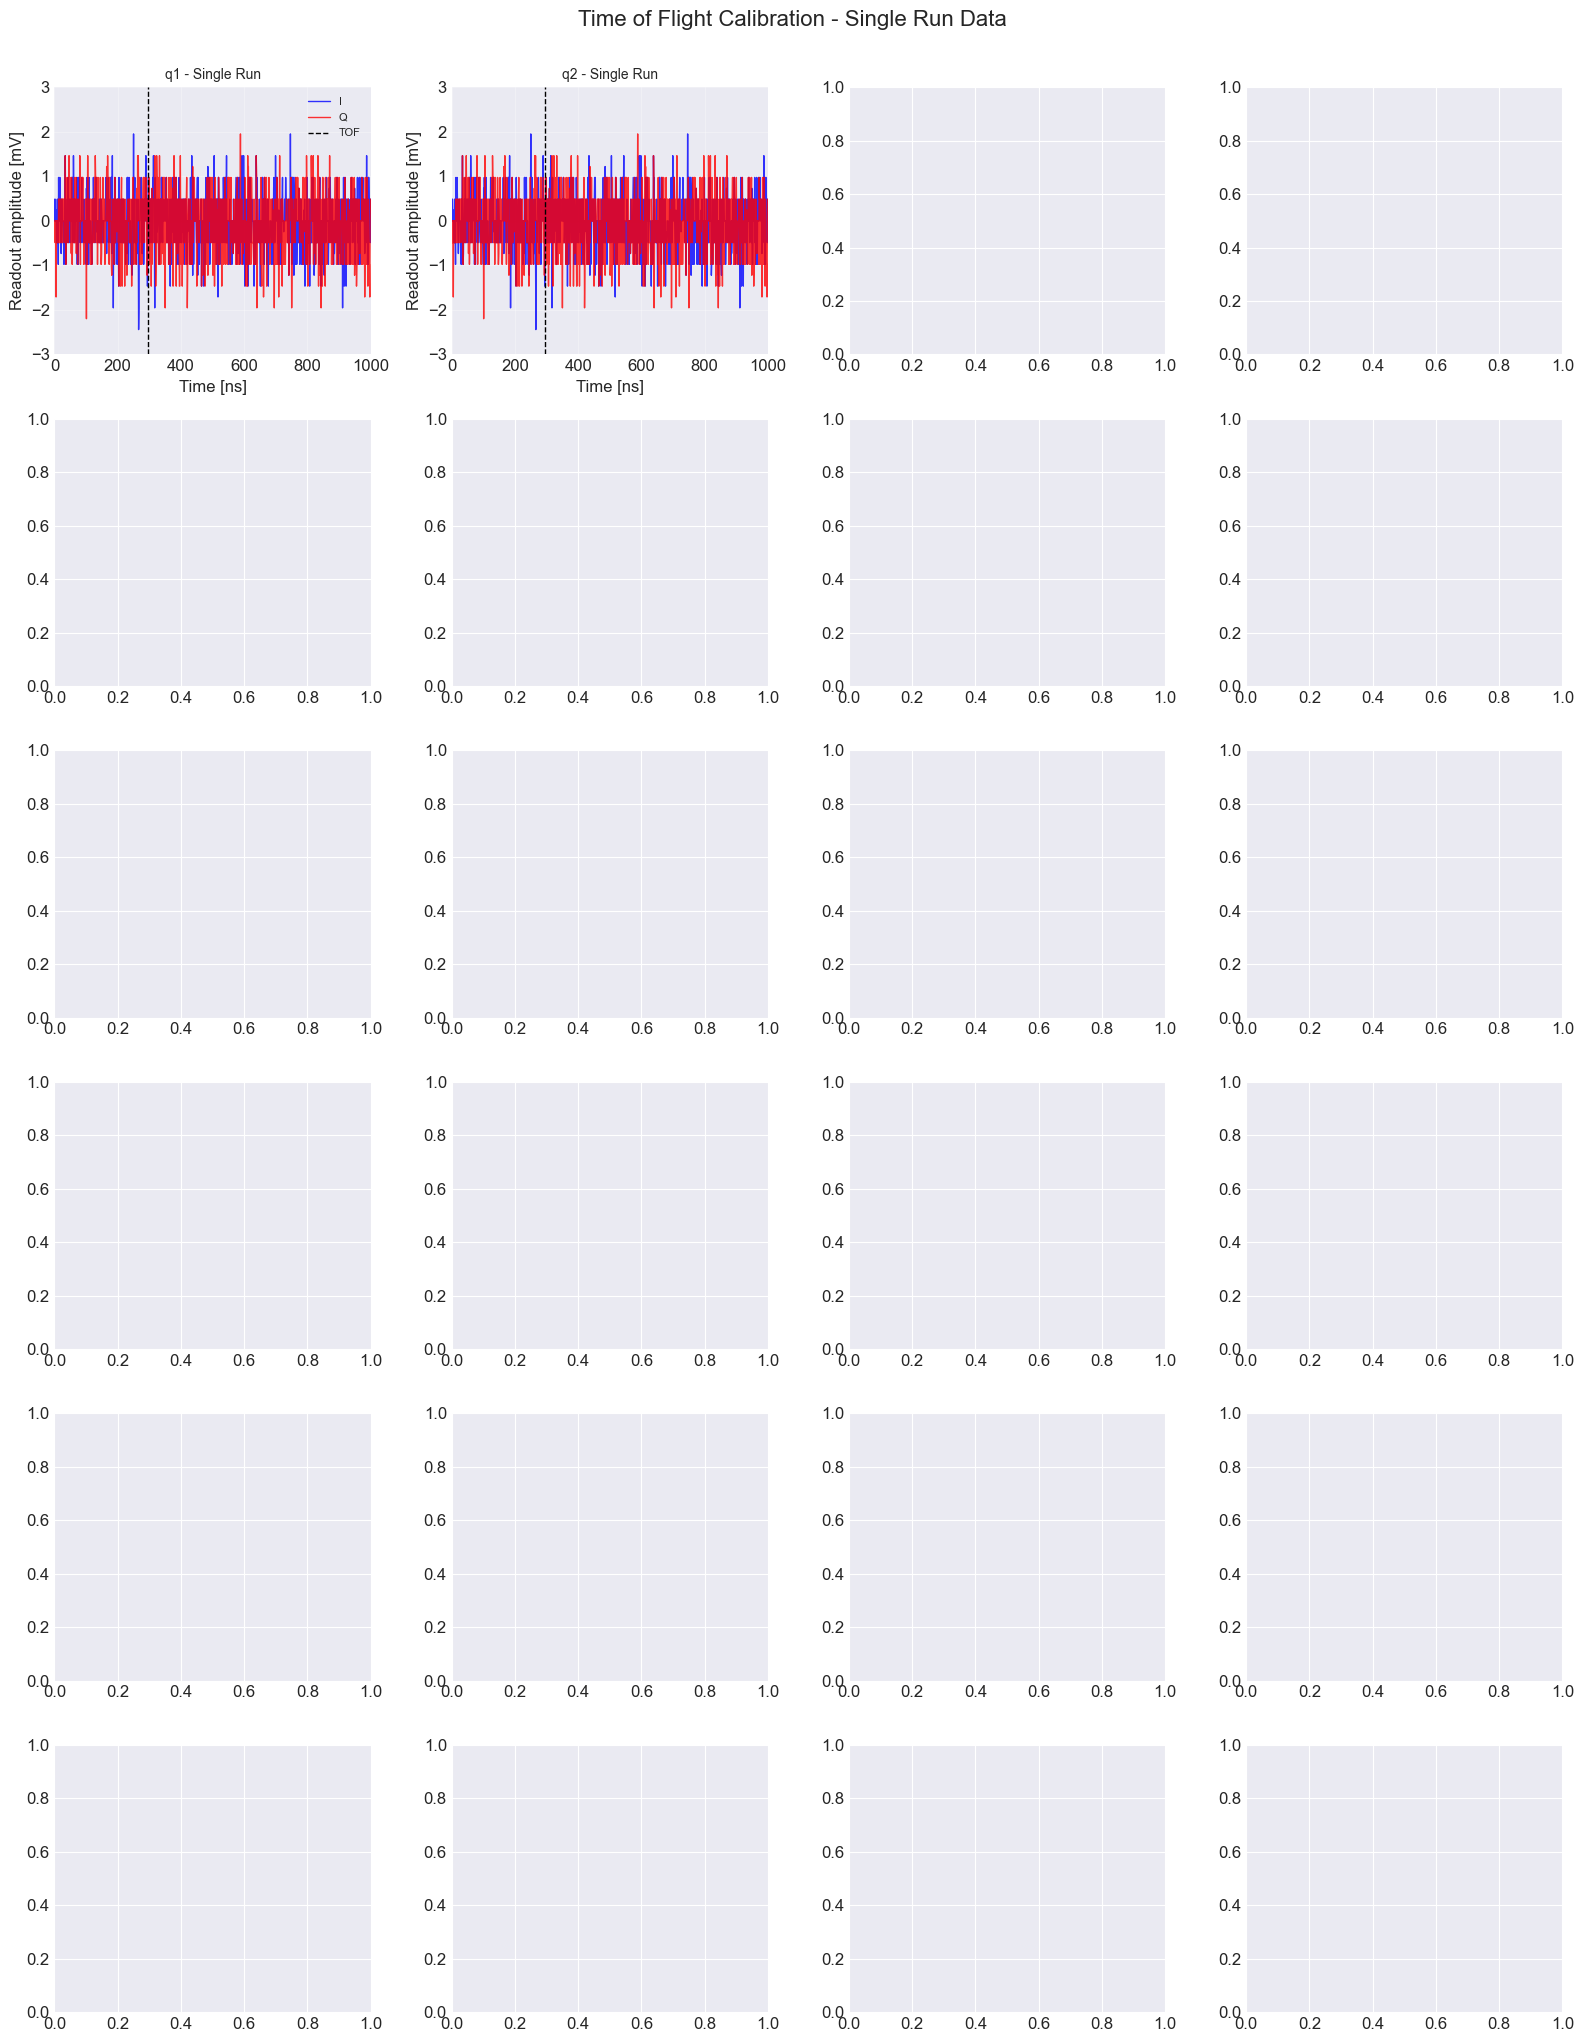


=== Delay Analysis ===
Unique delay values: [296.]
Delay 296.0 ns: q1, q2 (2 qubits)

=== Missing Information ===
The following information was not found in the provided data files:
1. The exact fitting algorithm/method used for TOF determination
2. The criteria for determining fitting success/failure
3. The specific single-run vs averaged-run parameters
4. The exact ADC range configuration (assumed ±0.5 mV based on graphs)
5. The relationship between 'filtered_adc' and the displayed data

Note: The graphs have been reproduced based on available data.
Some visual elements may differ from the original if they depend on missing information.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import json
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Load data files
print("Loading data files...")
ds_raw = xr.open_dataset('ds_raw.h5')
ds_fit = xr.open_dataset('ds_fit.h5')

with open('data.json', 'r') as f:
    data_json = json.load(f)

with open('node.json', 'r') as f:
    node_json = json.load(f)

# Extract qubit information
qubits = ds_raw['qubit'].values
n_qubits = len(qubits)
print(f"Number of qubits: {n_qubits}")
print(f"Qubits: {qubits}")

# Extract fitting success information
success = ds_fit['success'].values
print(f"\nFitting success for each qubit: {success}")

# Extract key parameters
delays = ds_fit['delay'].values
thresholds = ds_fit['threshold'].values
readout_time = ds_raw['readout_time'].values

# Check fit_results from data.json
if 'fit_results' in data_json:
    fit_results = data_json['fit_results']
    print(f"\nNumber of fit results available: {len(fit_results)}")

# Create figure with subplots (similar to the provided images)
fig, axes = plt.subplots(6, 4, figsize=(16, 20))
axes = axes.flatten()

# Color scheme based on the images
color_I = 'blue'
color_Q = 'red'
color_I_single = 'blue'
color_Q_single = 'red'
color_tof = 'black'
color_adc_range = 'lightgray'

# ADC range (based on the images, appears to be ±0.5 mV)
adc_range = 0.5e-3

for idx, (qubit, ax) in enumerate(zip(qubits, axes)):
    if idx >= n_qubits:
        ax.axis('off')
        continue
    
    # Get qubit index
    q_idx = idx
    
    # Extract data for this qubit
    adcI = ds_raw['adcI'].sel(qubit=qubit).values
    adcQ = ds_raw['adcQ'].sel(qubit=qubit).values
    adc_single_runI = ds_raw['adc_single_runI'].sel(qubit=qubit).values
    adc_single_runQ = ds_raw['adc_single_runQ'].sel(qubit=qubit).values
    
    # Get delay and threshold for this qubit
    delay = delays[q_idx]
    threshold = thresholds[q_idx]
    fitting_success = success[q_idx]
    
    # Plot ADC range as background
    ax.axhspan(-adc_range, adc_range, alpha=0.3, color=color_adc_range, label='ADC Range' if idx == 0 else '')
    
    # Plot I and Q averaged data
    ax.plot(readout_time, adcI * 1e3, color=color_I, alpha=0.8, linewidth=1, label='I')
    ax.plot(readout_time, adcQ * 1e3, color=color_Q, alpha=0.8, linewidth=1, label='Q')
    
    # Add TOF lines if fitting was successful
    if fitting_success:
        ax.axvline(x=delay, color=color_tof, linestyle='--', linewidth=1, label='TOF')
    
    # Add ADC range text (similar to images)
    ax.text(0.02, 0.95, 'ADC Range', transform=ax.transAxes, 
            fontsize=8, verticalalignment='top', color='gray')
    
    # Set labels and title
    ax.set_title(f'{qubit}', fontsize=10)
    ax.set_xlabel('Time [ns]')
    ax.set_ylabel('Readout amplitude [mV]')
    
    # Set y-axis limits based on the images
    ax.set_ylim(-0.6, 0.6)
    ax.set_xlim(0, 1000)
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Add legend only for the first subplot
    if idx == 0:
        # Create custom legend similar to the images
        legend_elements = [
            mpatches.Patch(color=color_I, label='I'),
            mpatches.Patch(color=color_Q, label='Q'),
            Line2D([0], [0], color=color_tof, linestyle='--', label='TOF'),
            mpatches.Patch(color=color_adc_range, alpha=0.3, label='ADC Range')
        ]
        ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

# Adjust layout
plt.tight_layout()
plt.suptitle('Time of Flight Calibration Results', fontsize=16, y=1.02)

# Save figure
plt.savefig('tof_calibration_results.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\n=== Summary Statistics ===")
print(f"Qubit | Delay (ns) | Threshold (mV) | Fitting Success")
print("-" * 50)
for i, qubit in enumerate(qubits):
    print(f"{qubit:5} | {delays[i]:10.1f} | {thresholds[i]*1e3:13.2f} | {success[i]}")

# Create a second figure showing single run data (if needed)
fig2, axes2 = plt.subplots(6, 4, figsize=(16, 20))
axes2 = axes2.flatten()

for idx, (qubit, ax) in enumerate(zip(qubits, axes2)):
    if idx >= n_qubits:
        ax.axis('off')
        continue
    
    # Get qubit index
    q_idx = idx
    
    # Extract single run data
    adc_single_runI = ds_raw['adc_single_runI'].sel(qubit=qubit).values
    adc_single_runQ = ds_raw['adc_single_runQ'].sel(qubit=qubit).values
    
    # Get delay for this qubit
    delay = delays[q_idx]
    fitting_success = success[q_idx]
    
    # Plot ADC range as background
    ax.axhspan(-adc_range, adc_range, alpha=0.3, color=color_adc_range)
    
    # Plot single run I and Q data
    ax.plot(readout_time, adc_single_runI * 1e3, color=color_I_single, alpha=0.8, linewidth=1, label='I')
    ax.plot(readout_time, adc_single_runQ * 1e3, color=color_Q_single, alpha=0.8, linewidth=1, label='Q')
    
    # Add TOF lines if fitting was successful
    if fitting_success:
        ax.axvline(x=delay, color=color_tof, linestyle='--', linewidth=1, label='TOF')
    
    # Set labels and title
    ax.set_title(f'{qubit} - Single Run', fontsize=10)
    ax.set_xlabel('Time [ns]')
    ax.set_ylabel('Readout amplitude [mV]')
    
    # Set y-axis limits
    ax.set_ylim(-3, 3)  # Larger range for single run data
    ax.set_xlim(0, 1000)
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Add legend only for the first subplot
    if idx == 0:
        ax.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.suptitle('Time of Flight Calibration - Single Run Data', fontsize=16, y=1.02)
plt.savefig('tof_calibration_single_run.png', dpi=150, bbox_inches='tight')
plt.show()

# Analysis of delays across qubits
print("\n=== Delay Analysis ===")
unique_delays = np.unique(delays)
print(f"Unique delay values: {unique_delays}")
for delay_val in unique_delays:
    qubits_with_delay = qubits[delays == delay_val]
    print(f"Delay {delay_val} ns: {', '.join(qubits_with_delay)} ({len(qubits_with_delay)} qubits)")

print("\n=== Missing Information ===")
print("The following information was not found in the provided data files:")
print("1. The exact fitting algorithm/method used for TOF determination")
print("2. The criteria for determining fitting success/failure")
print("3. The specific single-run vs averaged-run parameters")
print("4. The exact ADC range configuration (assumed ±0.5 mV based on graphs)")
print("5. The relationship between 'filtered_adc' and the displayed data")
print("\nNote: The graphs have been reproduced based on available data.")
print("Some visual elements may differ from the original if they depend on missing information.")